In [3]:
import os
import pickle
import numpy as np
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.metrics import confusion_matrix,classification_report

In [6]:
os.environ["CUBA_VISIBLE_DEVICES"]="-1"
tf.keras.backend.clear_session()

In [7]:
with open("data_batch_1 (1)","rb") as f:
    batch=pickle.load(f,encoding='bytes')
x=batch[b'data']
y=np.array(batch[b'labels'])

In [8]:
x_images=x.reshape(-1,3,32,32).transpose(0,2,3,1)

In [9]:
label_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

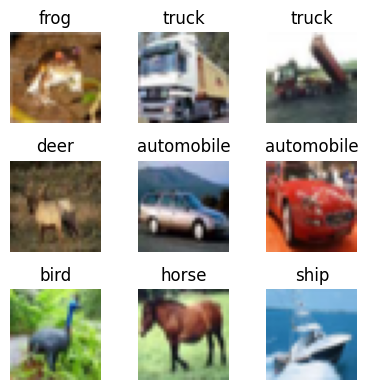

In [10]:
plt.figure(figsize=(4,4))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_images[i])
    plt.title(label_names[y[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [11]:
x_images=x.reshape(-1,3,32,32).transpose(0,2,3,1).astype("float32")/255.0

In [12]:
num_classes=10
y_cat=tf.keras.utils.to_categorical(y,num_classes=num_classes)

In [13]:
x_train,y_train=x_images[:4000],y_cat[:4000]
x_test,y_test=x_images[4000:5000],y_cat[4000:5000]

In [14]:
print("train set:",x_train.shape,y_train.shape)
print("test set:",x_test.shape,y_test.shape)

train set: (4000, 32, 32, 3) (4000, 10)
test set: (1000, 32, 32, 3) (1000, 10)


In [15]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),
                            activation='relu',
                            input_shape=(32,32,3)),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(num_classes,activation='softmax')
                          ])

C:\Users\students\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2085 - loss: 2.1009 - val_accuracy: 0.3020 - val_loss: 1.8302
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3310 - loss: 1.8112 - val_accuracy: 0.3770 - val_loss: 1.6818
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3853 - loss: 1.6617 - val_accuracy: 0.4040 - val_loss: 1.6414
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4392 - loss: 1.5108 - val_accuracy: 0.4660 - val_loss: 1.5392
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4942 - loss: 1.4008 - val_accuracy: 0.4730 - val_loss: 1.4611
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5332 - loss: 1.3027 - val_accuracy: 0.4790 - val_loss: 1.4327
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5642 - loss: 1.2266 - val_accuracy: 0.5260 - val_loss: 1.3912
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5800 - loss: 1.1815 - val_accuracy: 0.5010 - v

In [19]:
train_loss,train_acc=model.evaluate(x_train,y_train,verbose=0)
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)

In [20]:
print(f"\n Training Accuracy: {train_acc:4f},loss:{train_loss:4f}")
print(f"\n Testing Accuracy: {test_acc:4f},loss:{test_loss:4f}")


 Training Accuracy: 0.675500,loss:0.906607

 Testing Accuracy: 0.525000,loss:1.389897


In [21]:
y_pred_probs=model.predict(x_test)
y_pred=np.argmax(y_pred_probs,axis=1)
y_true=np.argmax(y_test,axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


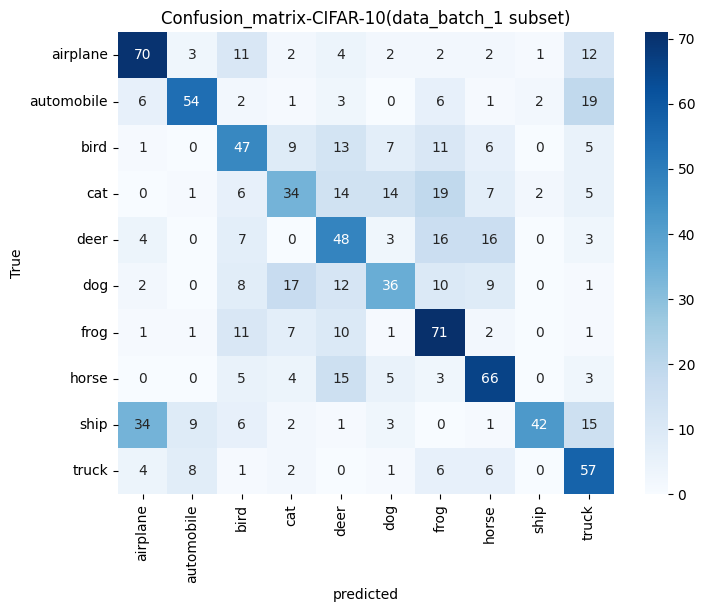

In [23]:
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=label_names,yticklabels=label_names)
plt.title("Confusion_matrix-CIFAR-10(data_batch_1 subset)")
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

In [24]:
print(classification_report(y_true,y_pred,target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.57      0.64      0.61       109
  automobile       0.71      0.57      0.64        94
        bird       0.45      0.47      0.46        99
         cat       0.44      0.33      0.38       102
        deer       0.40      0.49      0.44        97
         dog       0.50      0.38      0.43        95
        frog       0.49      0.68      0.57       105
       horse       0.57      0.65      0.61       101
        ship       0.89      0.37      0.53       113
       truck       0.47      0.67      0.55        85

    accuracy                           0.53      1000
   macro avg       0.55      0.53      0.52      1000
weighted avg       0.56      0.53      0.52      1000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


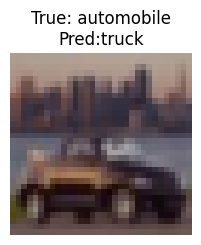

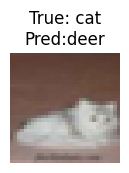

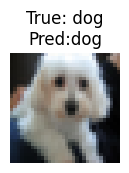

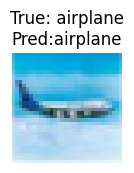

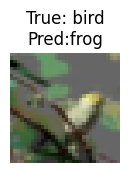

In [26]:
num_samples=5
idx=np.random.randint(0,len(x_test),num_samples)
sample_images=x_test[idx]
sample_labels=y_true[idx]
sample_preds=np.argmax(model.predict(sample_images),axis=1)
plt.figure(figsize=(10,4))
for i in range(num_samples):
    plt.subplot(1,num_samples,i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {label_names[sample_labels[i]]}\nPred:{label_names[sample_preds[i]]}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()    